In [1]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns

In [18]:
sns.set()

In [3]:
con = sqlite3.connect('dataset\salary_data.sqlite3')
list(con.execute('select name from sqlite_master'))

[('salary_data',)]

In [4]:
df = pd.read_sql('select * from salary_data', con)

In [5]:
df.head()

,ID,income,age,gender,education_level
0,12182,86519.608537,45,M,2.0
1,81213,83085.864980,30,M,2.0
2,1996,82606.214973,22,M,2.0
3,9366,81551.229988,36,M,2.0
4,9733,79593.253224,51,M,1.0


In [51]:
df[['income', 'age', 'education_level']].describe()

,income,age,education_level
count,100000.000000,100000.000000,99569.000000
mean,40412.516471,32.971000,1.687594
std,10830.793058,9.395403,0.834609
min,15000.000000,18.000000,0.000000
25%,33354.667673,26.000000,1.000000
50%,40097.697667,32.000000,2.000000
75%,46950.875508,38.000000,2.000000
max,285342.491970,69.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               100000 non-null  int64  
 1   income           100000 non-null  float64
 2   age              100000 non-null  int64  
 3   gender           100000 non-null  object 
 4   education_level  99569 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 3.8+ MB


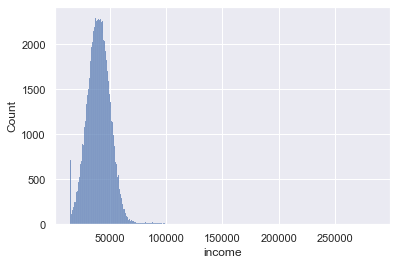

In [52]:
sns.histplot(df, x='income');

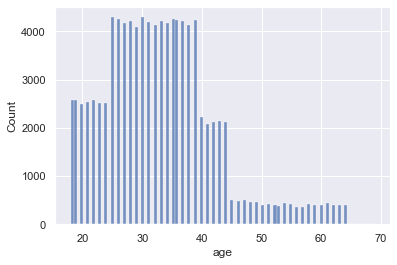

In [53]:
sns.histplot(df, x='age');

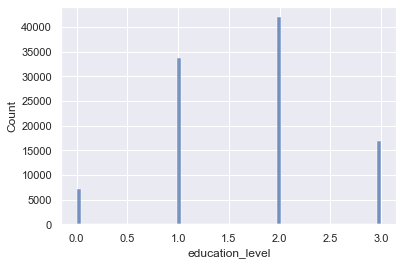

In [54]:
sns.histplot(df, x='education_level');

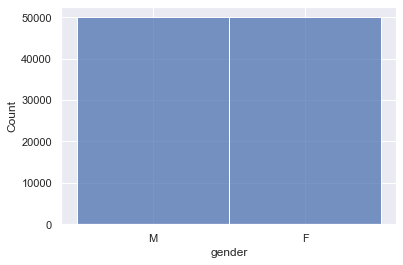

In [55]:
sns.histplot(df, x='gender');

In [7]:
df.age.unique() 

array([45, 30, 22, 36, 51, 52, 48, 49, 37, 33, 55, 34, 40, 25, 41, 56, 26,
       47, 32, 53, 38, 46, 58, 31, 60, 43, 35, 23, 39, 50, 29, 42, 54, 44,
       63, 57, 19, 21, 62, 64, 59, 61, 28, 27, 18, 20, 24, 69, 67, 66, 65],
      dtype=int64)

In [13]:
df1 = df[['income', 'age']].groupby('age').mean()
df1.head()

,income
age,
18,34735.087924
19,34380.206131
20,34785.563507
21,34498.317974
22,34564.081560


In [28]:
df1.to_sql('age-income', con, if_exists='replace')

51

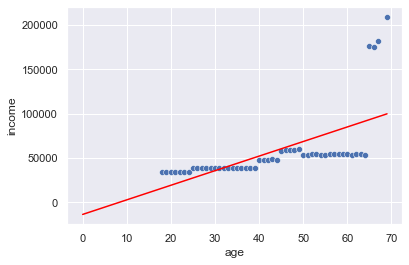

In [69]:
sns.scatterplot(x=df1.index, y=df1.income)
sns.lineplot(x=range(70), y=np.poly1d(np.polyfit(df1.index, df1.income, 1))(range(70)), color='red');

In [32]:
df1.mean() # 57098 -> average income

income    57098.314455
dtype: float64

In [38]:
df2 = df[['gender', 'income', 'age', 'education_level']].groupby('gender').mean()
df2

,income,age,education_level
gender,,,
F,40404.125225,33.03342,1.685528
M,40420.907718,32.90858,1.689659


In [39]:
df2.to_sql('groupby_gender', con, if_exists='replace')

2

In [40]:
df3 = df[['education_level', 'income', 'age']].groupby('education_level').mean()
df3

,income,age
education_level,,
0.0,34177.745355,31.473875
1.0,39369.589101,32.504760
2.0,40540.069071,32.720889
3.0,44859.626462,35.209676


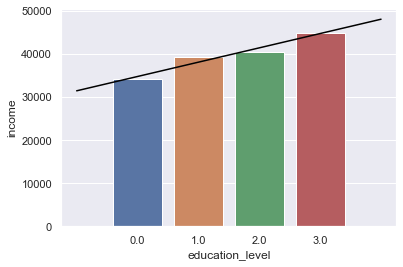

In [65]:
sns.barplot(x=df3.index, y=df3.income); # Income increases when education_level increases
sns.lineplot(x=range(-1, 5), y=np.poly1d(np.polyfit(df3.index, df3.income, 1))(range(-1, 5)), color='black');

In [47]:
df3.to_sql('groupby_education_level', con, if_exists='replace')

4